In [284]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  6 15:14:16 2022

@author: zhuch
"""

# -*- coding: utf-8 -*-
"""
Created on Thu May  5 17:30:53 2022

@author: zhuch
"""

import pickle

import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torch.nn.functional as F

#%%

# with open("speckle.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("SLM.dat", 'rb') as f:
#     output_list =pickle.load(f)
    
#%%

with open("data/medium_10238.dat", 'rb') as f:
    input_list = pickle.load(f)

with open("data/experiment results/Natural_10238.dat", 'rb') as f:
    output_list =pickle.load(f)

#%%

# with open("data/natcom/medium_blur.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("data/natcom/medium_groundtruth.dat", 'rb') as f:
#     output_list =pickle.load(f)

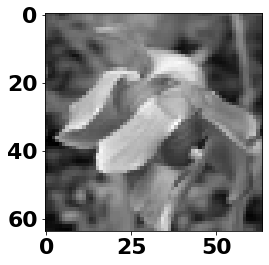

In [204]:
from numpy.fft import fft2, fftshift
s  = output_list[22]
plt.figure()
plt.imshow(s.reshape(64,64), cmap = 'gray')
plt.show()

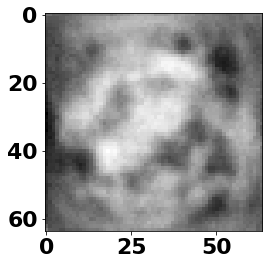

In [205]:
h  = input_list[22]
plt.figure()
plt.imshow(h.reshape(64,64), cmap = 'gray')
plt.show()

In [206]:
h

array([[[0.33907032, 0.3364939 , 0.28349358, ..., 0.38098738,
         0.36486268, 0.38682964],
        [0.26988518, 0.25189322, 0.25608328, ..., 0.34792423,
         0.3285668 , 0.3747368 ],
        [0.2415221 , 0.23788008, 0.24729143, ..., 0.348359  ,
         0.33223292, 0.35624844],
        ...,
        [0.18540326, 0.22421317, 0.2217826 , ..., 0.33418584,
         0.30315602, 0.27052465],
        [0.29200858, 0.21506374, 0.25611973, ..., 0.35453865,
         0.2756325 , 0.300683  ],
        [0.38049254, 0.2697089 , 0.25755915, ..., 0.36960253,
         0.28779593, 0.31257528]]], dtype=float32)

In [285]:

#%%
# s = input_list[5]
# x = np.arange(0,112,1)
# y = np.arange(0,112,1)
# X,Y = np.meshgrid(x,y)
# plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(X,Y,s.reshape(112,112), cmap='viridis')
# # plt.colorbar()
# plt.show()

#%%
N_sample = 5000
train_rate = 0.9
train_set_number = int(train_rate*N_sample)

input_dim = (64,64)

input_H = np.array(input_list).reshape(-1,1, *input_dim)
label = np.array(output_list).reshape(-1,1, 64, 64)

train_number = np.arange(0,N_sample, dtype ='int')
np.random.shuffle(train_number)

x_train = input_H[train_number[0:train_set_number]]
x_test = input_H[train_number[train_set_number:N_sample]]

y_train =label[train_number[0:train_set_number]]
y_test = label[train_number[train_set_number:N_sample]]

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.FloatTensor(y_train/256.0)
y_test = torch.FloatTensor(y_test/256.0)
    
    
batch_size = 128

# create data loaders
train_dataloader = DataLoader(list(zip(x_train, y_train)), batch_size = batch_size )
test_dataloader = DataLoader(list(zip(x_test,y_test)),  batch_size = batch_size )

#%%
del input_list
del output_list
del input_H
del label
#%%
torch.cuda.empty_cache()


In [45]:
#%%
# device = 'cuda'
# Nnodes = 4096

# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(64*64, Nnodes)
#         self.fc2 = nn.Linear(Nnodes, 64*64)
#         self.dp = nn.Dropout(0.3)
#         self.BN = nn.BatchNorm1d(Nnodes)
#         self.BN2 = nn.BatchNorm1d(64*64)  
#         self.flatten = nn.Flatten()
        
#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.BN(self.dp(F.relu(self.fc1(x))))
#         x = self.BN2(self.dp(F.sigmoid(self.fc2(x))))
#         # x = self.dp(F.relu(self.fc2(x)))
#         x = x.view(-1,1,64,64)
#         return x

# model = NeuralNetwork().to(device)
# from torchsummary import summary
# summary(model, (1, 64, 64))

#%%
# # Define model
# Nnodes = 4096

# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(64*64, Nnodes)
#         self.fc2 = nn.Linear(Nnodes, 112*112)
#         self.dp = nn.Dropout(0.5)
#         self.BN = nn.BatchNorm1d(Nnodes)
#         self.BN2 = nn.BatchNorm1d(112*112)  
# #         self.BN3 = nn.BatchNorm2d(10)  
# #         self.ct1 = nn.ConvTranspose2d(1,10,2,stride = 2)
# #         self.ct2 = nn.ConvTranspose2d(10,6,2,stride = 2)
        
# #         self.conv2 = nn.Conv2d(6,1,3)
# #         self.pool = nn.MaxPool2d(2,2)
#         self.flatten = nn.Flatten()
# #         self.fc3 = nn.Linear(3969, 64*64)
        
#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.BN(self.dp(F.leaky_relu(self.fc1(x))))
#         x = self.BN2(self.dp(F.relu(self.fc2(x))))
#         x = x.view(-1,1,112,112)
#         # x = F.relu(self.ct1(x))
#         # x = F.relu(self.ct2(x))
#         # x = self.pool(self.conv2(x))
#         # x = self.flatten(x)
#         # x = self.dp(F.leaky_relu(self.fc3(x)))
#         # x = x.view(-1,1,64,64)
#         return x

# model = NeuralNetwork().to(device)
# from torchsummary import summary
# summary(model, (1, 64, 64))

#%%

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 4096]               0
            Linear-2                 [-1, 4096]      16,781,312
           Dropout-3                 [-1, 4096]               0
       BatchNorm1d-4                 [-1, 4096]           8,192
            Linear-5                 [-1, 4096]      16,781,312
           Dropout-6                 [-1, 4096]               0
       BatchNorm1d-7                 [-1, 4096]           8,192
Total params: 33,579,008
Trainable params: 33,579,008
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.22
Params size (MB): 128.09
Estimated Total Size (MB): 128.33
----------------------------------------------------------------


In [16]:
# !pip install torchsummary

  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [ ]:
# import torchvision
# class Block(nn.Module):
#     def __init__(self, in_ch, out_ch):
#         super().__init__()
#         self.conv1 = nn.Conv2d(in_ch, out_ch, 3)
#         self.relu  = nn.ReLU()
#         self.conv2 = nn.Conv2d(out_ch, out_ch, 3)
    
#     def forward(self, x):
#         return self.conv2(self.relu(self.conv1(x)))


# class Encoder(nn.Module):
#     def __init__(self, chs=(1,64,128)):
#         super().__init__()
#         self.enc_blocks = nn.ModuleList([Block(chs[i], chs[i+1]) for i in range(len(chs)-1)])
#         self.pool       = nn.MaxPool2d(2)
    
#     def forward(self, x):
#         ftrs = []
#         for block in self.enc_blocks:
#             x = block(x)
#             ftrs.append(x)
#             x = self.pool(x)
#         return ftrs


# class Decoder(nn.Module):
#     def __init__(self, chs=(128, 64)):
#         super().__init__()
#         self.chs         = chs
#         self.upconvs    = nn.ModuleList([nn.ConvTranspose2d(chs[i], chs[i+1], 2, 2) for i in range(len(chs)-1)])
#         self.dec_blocks = nn.ModuleList([Block(chs[i], chs[i+1]) for i in range(len(chs)-1)]) 
        
#     def forward(self, x, encoder_features):
#         for i in range(len(self.chs)-1):
#             x        = self.upconvs[i](x)
#             enc_ftrs = self.crop(encoder_features[i], x)
#             x        = torch.cat([x, enc_ftrs], dim=1)
#             x        = self.dec_blocks[i](x)
#         return x
    
#     def crop(self, enc_ftrs, x):
#         _, _, H, W = x.shape
#         enc_ftrs   = torchvision.transforms.CenterCrop([H, W])(enc_ftrs)
#         return enc_ftrs


# class UNet(nn.Module):
#     def __init__(self, enc_chs=(1,64,128), dec_chs=( 128, 64), num_class=1, retain_dim=True, out_sz=(64,64)):
#         super().__init__()
#         self.encoder     = Encoder(enc_chs)
#         self.decoder     = Decoder(dec_chs)
#         self.head        = nn.Conv2d(dec_chs[-1], num_class, 1)
#         self.retain_dim  = retain_dim
#         self.out_sz =  out_sz

#     def forward(self, x):
#         enc_ftrs = self.encoder(x)
#         out      = self.decoder(enc_ftrs[::-1][0], enc_ftrs[::-1][1:])
#         out      = self.head(out)
#         if self.retain_dim:
#             out = F.interpolate(out, self.out_sz)
#         return out
    
# model = UNet().to(device)
# from torchsummary import summary
# summary(model, (1, 112, 112))

In [286]:
import torchvision
device = "cuda"
# input_dim = (112,112)
# output_dim = (64,64)

def conv(in_channels, out_channels, pad = 1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 4, padding = pad, stride = 2),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(inplace=True)
    )   

def convup(in_channels, out_channels, pad = 1):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, 4, padding = pad, stride = 2),
        nn.Dropout(0.4),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )   

# class UNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.down1 = conv(1,64)
#         self.down2 = conv(64,128)
#         self.down3 = conv(128,256)
#         self.down4 = conv(256,512)
#         self.down5 = conv(512, 1024)
#         self.down6 = conv(1024, 2048)
        
#         self.up1 = convup(2048,1024)
#         self.up2 = convup(1024+1024,512)
#         self.up3 = convup(512+512,256)
#         self.up4 = convup(256+256,128)
#         self.up5 = convup(128+128,64)
#         self.up6 = nn.ConvTranspose2d(64, 1, 4, padding = 1, stride = 2)
#         self.BN = nn.BatchNorm2d(1)
        
        
#     def forward(self, x):
#         x1 = self.down1(x)
#         x2 = self.down2(x1)
#         x3 = self.down3(x2)
#         x4 = self.down4(x3)
#         x5 = self.down5(x4)
#         x6 = self.down6(x5)
        
#         x = self.up1(x6)
#         x = torch.cat([x, x5], dim = 1)
#         x = self.up2(x)
#         x = torch.cat([x, x4], dim = 1)
#         x = self.up3(x)
#         x = torch.cat([x, x3], dim = 1)
#         x = self.up4(x)
#         x = torch.cat([x, x2], dim = 1)
#         x = self.up5(x)       
#         x = F.tanh(self.BN(self.up6(x)))
        
#         return x

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.down1 = conv(1,64)
        self.down2 = conv(64,128)
        self.down3 = conv(128,256)
        self.down4 = conv(256,512)
        self.down5 = conv(512, 1024)
        self.down6 = conv(1024, 2048)
        
        self.up1 = convup(2048,1024)
        self.up2 = convup(1024+1024,512)
        self.up3 = convup(512+512,256)
        self.up4 = convup(256+256,128)
        self.up5 = convup(128+128,64)
        self.up6 = nn.ConvTranspose2d(64, 1, 4, padding = 1, stride = 2)
        self.BN = nn.BatchNorm2d(1)
        
        
    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x5 = self.down5(x4)
        x6 = self.down6(x5)
        
        x = self.up1(x6)
        x = torch.cat([x, x5], dim = 1)
        x = self.up2(x)
        x = torch.cat([x, x4], dim = 1)
        x = self.up3(x)
        x = torch.cat([x, x3], dim = 1)
        x = self.up4(x)
        x = torch.cat([x, x2], dim = 1)
        x = self.up5(x)       
        x = F.tanh(self.BN(self.up6(x)))
        
        return x
    
model = UNet().to(device)
from torchsummary import summary
summary(model, (1, 64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,088
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         LeakyReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 16, 16]         131,200
       BatchNorm2d-5          [-1, 128, 16, 16]             256
         LeakyReLU-6          [-1, 128, 16, 16]               0
            Conv2d-7            [-1, 256, 8, 8]         524,544
       BatchNorm2d-8            [-1, 256, 8, 8]             512
         LeakyReLU-9            [-1, 256, 8, 8]               0
           Conv2d-10            [-1, 512, 4, 4]       2,097,664
      BatchNorm2d-11            [-1, 512, 4, 4]           1,024
        LeakyReLU-12            [-1, 512, 4, 4]               0
           Conv2d-13           [-1, 1024, 2, 2]       8,389,632
      BatchNorm2d-14           [-1, 102

In [68]:
# !pip install torchsummary
from torch.optim.optimizer import Optimizer
import math

class Nadam(Optimizer):
    """Implements Nadam algorithm (a variant of Adam based on Nesterov momentum).
    It has been proposed in `Incorporating Nesterov Momentum into Adam`__.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 2e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        schedule_decay (float, optional): momentum schedule decay (default: 4e-3)
    __ http://cs229.stanford.edu/proj2015/054_report.pdf
    __ http://www.cs.toronto.edu/~fritz/absps/momentum.pdf
        Originally taken from: https://github.com/pytorch/pytorch/pull/1408
        NOTE: Has potential issues but does work well on some problems.
    """

    def __init__(self, params, lr=2e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, schedule_decay=4e-3):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        defaults = dict(
            lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, schedule_decay=schedule_decay)
        super(Nadam, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad
                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['m_schedule'] = 1.
                    state['exp_avg'] = torch.zeros_like(p)
                    state['exp_avg_sq'] = torch.zeros_like(p)

                # Warming momentum schedule
                m_schedule = state['m_schedule']
                schedule_decay = group['schedule_decay']
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']
                eps = group['eps']
                state['step'] += 1
                t = state['step']
                bias_correction2 = 1 - beta2 ** t

                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])

                momentum_cache_t = beta1 * (1. - 0.5 * (0.96 ** (t * schedule_decay)))
                momentum_cache_t_1 = beta1 * (1. - 0.5 * (0.96 ** ((t + 1) * schedule_decay)))
                m_schedule_new = m_schedule * momentum_cache_t
                m_schedule_next = m_schedule * momentum_cache_t * momentum_cache_t_1
                state['m_schedule'] = m_schedule_new

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1. - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1. - beta2)

                denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(eps)
                p.addcdiv_(grad, denom, value=-group['lr'] * (1. - momentum_cache_t) / (1. - m_schedule_new))
                p.addcdiv_(exp_avg, denom, value=-group['lr'] * momentum_cache_t_1 / (1. - m_schedule_next))

        return loss

In [287]:

#%%
import ssim
loss_fn = ssim.SSIM()

from torch.optim.lr_scheduler import ReduceLROnPlateau
# loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# optimizer = Nadam(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss
            
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Loss:  {test_loss:>8f} \n")
    return test_loss
    
    

In [ ]:
#%%  Neural network training


epochs = 50

Loss_train = []
Loss_test = []
steps = []

best_loss = 1.0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    test_loss = test(test_dataloader, model, loss_fn)
    Loss_train.append(train_loss)
    Loss_test.append(test_loss)
    if test_loss<best_loss:
        best_loss = test_loss
    steps.append(t)
    scheduler.step(test_loss)
print("Done!")    
    

# %%
plt.figure(figsize = (8,6))
plt.title("MSE Loss vs Epochs")
plt.plot(steps, Loss_train, label = 'train')
plt.plot(steps, Loss_test, label = 'test')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
        
#%%
torch.cuda.empty_cache()
#%%


#%%
# figure configuration
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


Epoch 1
-------------------------------
Train loss: 1.000554  [    0/ 4500]
Train loss: 0.976507  [ 1280/ 4500]
Train loss: 0.813651  [ 2560/ 4500]
Train loss: 0.699799  [ 3840/ 4500]
Test Loss:  0.609225 

Epoch 2
-------------------------------
Train loss: 0.612639  [    0/ 4500]
Train loss: 0.525091  [ 1280/ 4500]
Train loss: 0.474290  [ 2560/ 4500]
Train loss: 0.463295  [ 3840/ 4500]
Test Loss:  0.442111 

Epoch 3
-------------------------------
Train loss: 0.446943  [    0/ 4500]
Train loss: 0.426105  [ 1280/ 4500]
Train loss: 0.417923  [ 2560/ 4500]
Train loss: 0.423561  [ 3840/ 4500]
Test Loss:  0.410002 

Epoch 4
-------------------------------
Train loss: 0.412949  [    0/ 4500]
Train loss: 0.400928  [ 1280/ 4500]
Train loss: 0.396520  [ 2560/ 4500]
Train loss: 0.408531  [ 3840/ 4500]
Test Loss:  0.400263 

Epoch 5
-------------------------------
Train loss: 0.402018  [    0/ 4500]
Train loss: 0.394022  [ 1280/ 4500]
Train loss: 0.386944  [ 2560/ 4500]
Train loss: 0.398310  [ 

In [288]:
torch.save(model.state_dict(), 'model/exp_mlmodel_medium.dat')

#%%  test model

test_model = UNet().to('cpu')

test_model.load_state_dict(torch.load('model/exp_mlmodel_medium.dat'))


<All keys matched successfully>

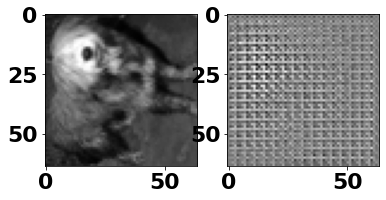

In [290]:
test_number = np.random.randint(0,200)

with torch.no_grad():
    test_model.eval()
    X= x_test[test_number].reshape(-1,1,64,64)
    pred = test_model(X)
plt.figure() 
plt.subplot(121)
plt.imshow(y_test[test_number].reshape(64,64), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(64,64), cmap = 'gray')
# plt.imshow(pred[0].reshape(64,64))
plt.show()


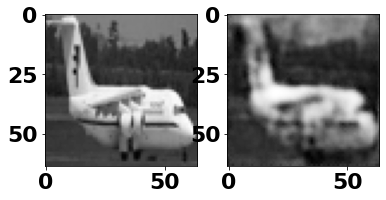

In [167]:
#%%
test_number = np.random.randint(0,200)

with torch.no_grad():
    test_model.eval()
    X= x_train[test_number].reshape(-1,1,*input_dim)
    pred = test_model(X)
plt.figure() 
plt.subplot(121)
plt.imshow(y_train[test_number].reshape(64,64), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(64,64), cmap = 'gray')
# plt.imshow(pred[0].reshape(64,64))
plt.show()

#%%
# test_number = np.random.randint(0,500)

# with torch.no_grad():
#     test_model.eval()
#     X = x_train[test_number].reshape(-1,1, *input_dim)
#     pred = test_model(X)
  
# plt.figure() 
# plt.subplot(121)
# plt.imshow(y_train[test_number].reshape(64,64), cmap = 'gray')  
# plt.subplot(122)
# plt.imshow(pred[0].reshape(64,64), cmap = 'gray')
# plt.show()